In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.decomposition import PCA

In [2]:
df = pd.read_csv('/content/breast-cancer.csv')

In [3]:
if 'id' in df.columns:
    df.drop(columns=['id'], inplace=True)

In [4]:
if df['diagnosis'].dtype == 'object':
    df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})  # Malignant=1, Benign=0

X = df.drop('diagnosis', axis=1)
y = df['diagnosis']

In [5]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [6]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.3, random_state=42)

In [9]:
def plot_decision_boundary(clf, X, y, title):
    h = .02  # step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.coolwarm)
    plt.title(title)
    plt.xlabel('PCA 1')
    plt.ylabel('PCA 2')
    plt.show()

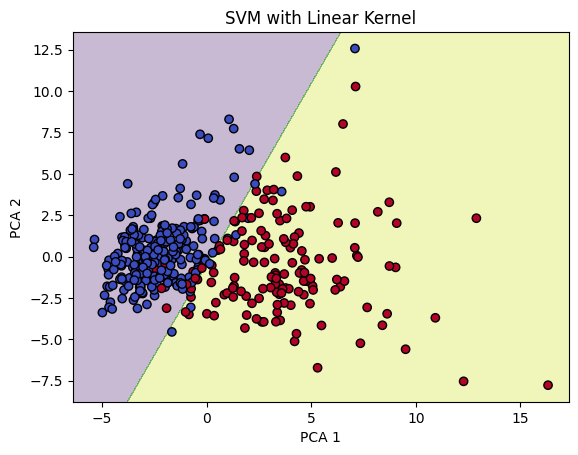

In [10]:
clf_linear = SVC(kernel='linear', C=1)
clf_linear.fit(X_train, y_train)
plot_decision_boundary(clf_linear, X_train, y_train, "SVM with Linear Kernel")

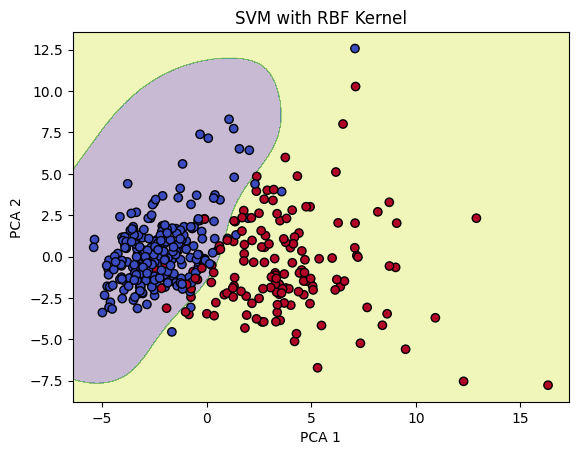

In [11]:
clf_rbf = SVC(kernel='rbf', gamma='scale', C=1)
clf_rbf.fit(X_train, y_train)
plot_decision_boundary(clf_rbf, X_train, y_train, "SVM with RBF Kernel")

In [12]:
param_grid = {'C': [0.1, 1, 10], 'gamma': [1, 0.1, 0.01]}
grid = GridSearchCV(SVC(kernel='rbf'), param_grid, refit=True, cv=5)
grid.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'gamma': [1, 0.1, 0.01]})

In [13]:
print("Best parameters found:", grid.best_params_)

Best parameters found: {'C': 1, 'gamma': 0.1}


In [14]:
y_pred = grid.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95       108
           1       0.93      0.89      0.91        63

    accuracy                           0.94       171
   macro avg       0.94      0.93      0.93       171
weighted avg       0.94      0.94      0.94       171

